## **TESTE Z PARA UMA AMOSTRA**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Cursos_Udemy/curso_estatistica_python/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [ ]:
enem_sp.head()

In [ ]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [7]:
colegiox.shape

(41, 28)

In [6]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,46.3,447.2,557.3,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,505.9,534.5,529.8,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,449.4,436.4,45.8,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,468.6,606.1,576.6,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,Águas de Lindóia,1,1,1,1,414.3,553.7,49.5,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


1) Analisar a classificação das variáveis

In [8]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [9]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [11]:
import plotly.express as px

In [12]:
grafico = px.box(colegiox, y="NOTA_REDACAO")
grafico.show()

4) Analisar Normalidade

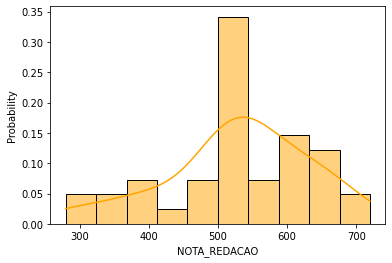

In [13]:
import seaborn as sns
sns.histplot(colegiox, x='NOTA_REDACAO', bins=10, color="orange", kde=True, stat="probability");

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

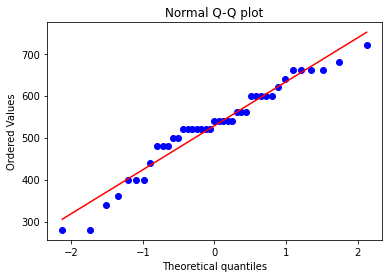

In [15]:
stats.probplot(colegiox['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [16]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox.NOTA_REDACAO)

(0.952975869178772, 0.08905196189880371)

In [17]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [18]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegiox.NOTA_REDACAO, dist = 'norm')

(0.15115505856545197, 0.019308888342997044)

In [19]:
# Teste Anderson-Darling
stats.anderson(colegiox.NOTA_REDACAO, 'norm')

AndersonResult(statistic=0.6984616237351489, critical_values=array([0.532, 0.606, 0.727, 0.848, 1.009]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**TESTE Z**

Média das notas do colégio X, comparada a média do Estado de São Paulo.

Ho = média é igual a de São Paulo : p > 0.05

Ha = média é diferente da de São Paulo : p <= 0.05

In [20]:
from statsmodels.stats.weightstats import ztest

In [21]:
enem_sp.NOTA_REDACAO.describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [23]:
stat, p = ztest(colegiox['NOTA_REDACAO'], value=593.0183221986639, )
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: -3.98
p-valor: 6.764690422432806e-05


In [22]:
colegiox.NOTA_REDACAO.describe()

count     41.000000
mean     528.292683
std      104.016884
min      280.000000
25%      480.000000
50%      540.000000
75%      600.000000
max      720.000000
Name: NOTA_REDACAO, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: z = -3,93

p_valor = 6.76e-05

Conclusão: Estatisticamente, a média do colégio x é diferente da média do Estado de São Paulo, com intervalo de confiança de 95%.

